In [1]:
import geopandas as gdp
from gerrychain import Graph, Partition, Election, MarkovChain
from gerrychain.constraints import single_flip_contiguous 
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept
from gerrychain.updaters import Tally, cut_edges
import os

In [2]:
default_path = os.path.join(os.getcwd(), "..", "shapefiles", "processed")
FL_path = os.path.join(default_path, "florida", "precinct_level_w_election.shp")

df = gdp.read_file(FL_path)

In [6]:
df.columns

Index(['pct_std', 'county', 'precinct', 'G20PRERTRU', 'G20PREDBID',
       'G20PRELJOR', 'G20PREODEL', 'G20PRESLAR', 'G20PREGHAW', 'G20PRECBLA',
       'G20PREOWRI', 'TOT_POP', 'WHITE_POP', 'ASN_POP', 'BLK_POP', 'HSP_POP',
       'DISTRICT', 'UNIQUE_ID', 'COUNTYFP', 'CONG_DIST', 'R_VOTES', 'D_VOTES',
       'geometry'],
      dtype='object')

In [4]:
election_FL = Election("SEN", {"Democratic": "D_VOTES", "Republican": "R_VOTES"})

/home/mark/.local/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i
/home/mark/.local/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:23: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  tree = STRtree(geometries)
/home/mark/.local/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:66: UserWarning: Found overlaps among the given polygons. Indices of overlaps: {(539, 543), (1482, 3632), (3175, 3179), (4655, 4685), (1054, 1793), (4689, 4696), (770, 1607), (1321, 2384), (4006, 4010), (4225, 4314), (3998, 4006), (1520, 1547), (2830, 3935), (1718, 2596), (159, 178), (3478, 3482), (3529, 3564), (4006, 4028), (1505, 1567), (4599, 4622), (3068, 3089), (3270, 3322), (3910, 3911), (3100, 3121), (3709, 3741), (4377, 4713), (3068, 3107), (1831, 1835), (28

/home/mark/.local/lib/python3.9/site-packages/gerrychain/graph/graph.py:169: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas = df.geometry.area.to_dict()
/home/mark/.local/lib/python3.9/site-packages/gerrychain/graph/graph.py:296: UserWarning: NA values found in column TOT_POP!
  warnings.warn("NA values found in column {}!".format(column))
/home/mark/.local/lib/python3.9/site-packages/gerrychain/graph/graph.py:296: UserWarning: NA values found in column WHITE_POP!
  warnings.warn("NA values found in column {}!".format(column))
/home/mark/.local/lib/python3.9/site-packages/gerrychain/graph/graph.py:296: UserWarning: NA values found in column ASN_POP!
  warnings.warn("NA values found in column {}!".format(column))
/home/mark/.local/lib/python3.9/site-packages/gerrychain/graph/graph.py:296: UserWarning: NA values found in column BLK_POP!
  warnings.

<AxesSubplot: >

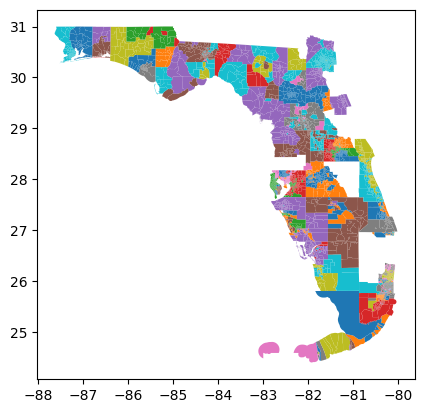

In [5]:
FL_graph = Graph.from_file(FL_path, ignore_errors=True)
FL_partition = Partition(
    FL_graph,
    assignment="CONG_DIST",
    updaters={
        "population": Tally("TOTPOP", alias="population"),
        "cut_edges": cut_edges,
        "SEN": election_FL
    }
)

FL_partition.plot()